# Questões

## Aluno: Lucas Silva Lima

##### Importação de bibliotecas

In [1]:
!pip install py7zr -q

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from scipy.io import loadmat
from sklearn.metrics import confusion_matrix

In [3]:
np.random.seed(25)

### 1) Baixe os sinais cerebrais de um indivíduo

In [4]:
data = loadmat("./S25.mat")['data']

In [5]:
data.shape

(64, 1500, 40, 6)

### 2) Organize sua matrix de entrada X e seu vetor de rótulos y

In [6]:
class_0 = data[61, 125:1375, 0, :] # 8 Hz

In [7]:
class_7 = data[61, 125:1375, 35, :] # 15 Hz

In [8]:
X = np.vstack([class_0.T, class_7.T])

In [9]:
X.shape

(12, 1250)

In [10]:
Y = np.ones((12, 1))
Y[6:, 0] *= -1

In [11]:
Y.shape

(12, 1)

### 3) Implemente o perceptron que receba em sua entrada a metriz de dados X e retorne o valor de y, indicando a frequência de estimulação f1 ou f2. Separe aleatoriamente 4 amostras de uma classe para treinar o perceptron e restante das amostras para validar o sistema

In [12]:
intervalo_c0 = list(range(0, 6))
intervalo_c7 = list(range(6, 12))

mask_train_c0 = random.sample(intervalo_c0, 4)
mask_train_c7 = random.sample(intervalo_c7, 4)

mask_test_c0 = [num for num in intervalo_c0 if num not in mask_train_c0]
mask_test_c7 = [num for num in intervalo_c7 if num not in mask_train_c7]

In [13]:
X_train = X[mask_train_c0 + mask_train_c7]
X_test = X[mask_test_c0 + mask_test_c7]

In [14]:
Y_train = Y[mask_train_c0 + mask_train_c7]
Y_test = Y[mask_test_c0 + mask_test_c7]

In [15]:
activation = lambda x: -1 if x < 0 else 1

In [16]:
activation_vetorizada = lambda y: (y > 0).astype(int) * 2 - 1

In [17]:
def perceptron(X_train, Y_train, W=None, learning_rate = 0.0005, training_steps = 100):

    if W is None:
        W = np.random.rand(X_train.shape[1])


    for i in range(training_steps):
        for j in range(len(X_train)):
            x = X_train[j]
            y = Y_train[j]
            l1 = np.dot(W, x)
            y_pred = activation(l1)
            error = y - y_pred
            update = learning_rate * error * x
            W += update

    return W

In [18]:
def results(X_test, Y_test, W):
    count_erro = 0
    count_acerto = 0
    for i in range(len(X_test)):
        y_pred = np.dot(X_test[i], W)

        if(activation(y_pred) == Y_test[i]):
            count_acerto = count_acerto+1

        else:
            count_erro = count_erro+1

    print('Número de acertos:', count_acerto, '\nNúmero de erros:', count_erro)


In [19]:
W1 = perceptron(X_train, Y_train)
results(X_test, Y_test, W1)

Número de acertos: 1 
Número de erros: 3


### 4) Como os valores de inicialização do vetor de pesos, taxa de aprendizado e demais parâmetros do modelo impactam o desempenho do sistema? Ilustre apresentando algumas configurações do modelo e o desempenho obtido


##### A inicialização dos pesos afeta a velocidade e a qualidade do aprendizado, com valores iniciais inadequados podendo atrasar ou impedir a convergência. A taxa de aprendizado controla quão rapidamente o modelo se ajusta, onde valores muito altos ou baixos podem levar, respectivamente, à instabilidade ou ao aprendizado lento.

In [20]:
# W = distr. uniforme * 1; learning rate = 0.0001; e training steps = 1000
W1 = perceptron(X_train, Y_train, W= np.random.rand(X_train.shape[1]), learning_rate=0.0001, training_steps = 1000)
results(X_test, Y_test, W1)

Número de acertos: 1 
Número de erros: 3


In [21]:
# W = distr. uniforme * 1; learning rate = 1; e training steps = 1
W2 = perceptron(X_train, Y_train, W= np.random.rand(X_train.shape[1]), learning_rate=1, training_steps = 1)
results(X_test, Y_test, W2)

Número de acertos: 4 
Número de erros: 0


In [22]:
# W = distr. uniforme * 0.01; learning rate = 0.005; e training steps = 100
W3 = perceptron(X_train, Y_train, W= np.random.rand(X_train.shape[1]) * 0.01, learning_rate=0.005, training_steps = 100)
results(X_test, Y_test, W3)

Número de acertos: 4 
Número de erros: 0


### 5) Analisando o desempenho do modelo nas simulações realizadas, o problema tratato é linearmente separável? Justifique

##### O Perceptron é conhecido por sua habilidade em solucionar problemas que são linearmente separáveis. Observando o desempenho do modelo nas simulações realizadas, é importante notar que, embora o Perceptron tenha conseguido resolver o problema apresentado para um conjunto de 4 amostras, esta performance não é suficiente para concluir definitivamente sobre a natureza da linearidade do problema em questão. Dada a complexidade e as características do problema (que são, por definição, de ordem não linear), é prudente considerá-lo um problema não linearmente separado.

### 6) Apresente a matriz de confusão, considerando somente as amostras do conjunto de validação do melhor modelo perceptron obtido 

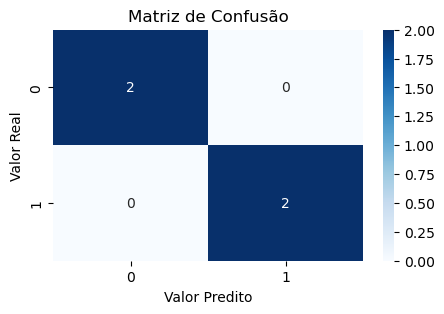

In [23]:
Y_pred = activation_vetorizada(np.dot(X_test, W3))
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()

### 7) Plot uma das linhas da matriz de entrada para cada classe e sua respectiva magnitude da transformada de Fourier (FFT). O que é possível observar no tempo e na frequência em casa um dos gráficos obtidos?

##### É possivel observar que em ambas classes de sinais, assumindo a representatividade das amostras, o conteúdo espectral se condensa nas frequências de valores baixos (5 a 100 Hz)

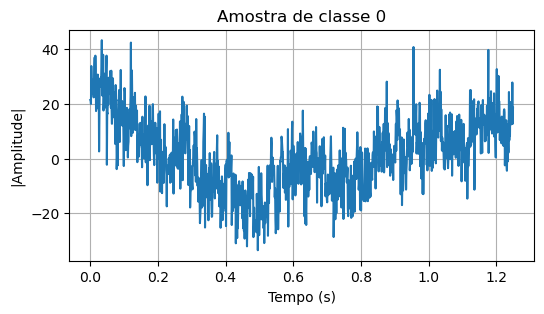

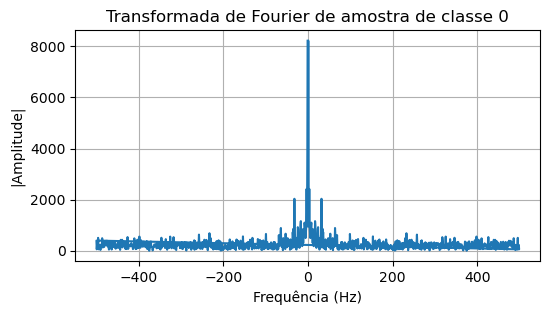

In [24]:
# Frequência de amostragem
Fs = 1000

# Período de amostragem
T = 1/Fs

# Comprimento do sinal
L = 1250

# Vetor de tempo
t = np.arange(0, L)*T

sinal = X[0]
freq = np.fft.fftfreq(len(sinal), T)
SINAL = np.fft.fft(sinal)

plt.figure(figsize=(6,3))
plt.plot(t, sinal)
plt.title('Amostra de classe 0')
plt.xlabel('Tempo (s)')
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(freq, np.abs(SINAL))
plt.title('Transformada de Fourier de amostra de classe 0')
plt.xlabel('Frequência (Hz)')
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

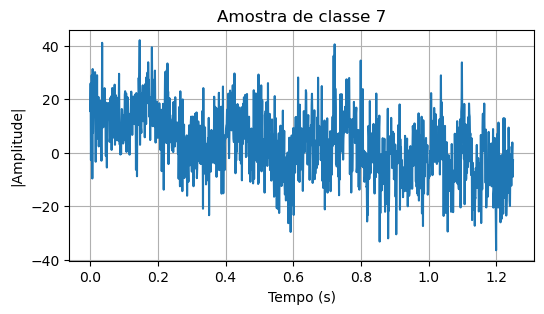

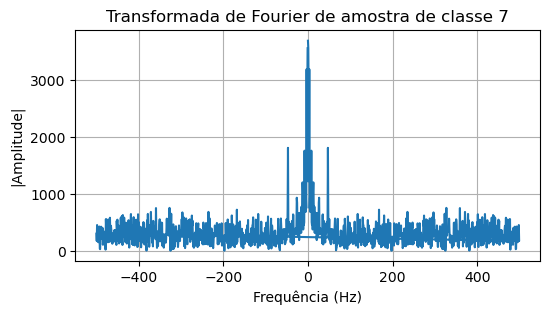

In [25]:
# Frequência de amostragem
Fs = 1000

# Período de amostragem
T = 1/Fs

# Comprimento do sinal
L = 1250

# Vetor de tempo
t = np.arange(0, L)*T

sinal = X[6]
freq = np.fft.fftfreq(len(sinal), T)
SINAL = np.fft.fft(sinal)

plt.figure(figsize=(6,3))
plt.plot(t, sinal)
plt.title('Amostra de classe 7')
plt.xlabel('Tempo (s)')
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(freq, np.abs(SINAL))
plt.title('Transformada de Fourier de amostra de classe 7')
plt.xlabel('Frequência (Hz)')
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

### 8) Proponha uma técnica de extração de características, de modo que não seja necessário empregar todas as 1250 amostras do sinal utilizado em cada coleta, mas que seja possível reduzir a dimensão de dados X sem perder a informação relevante.

##### A técnica empregada consiste em fazer o treinamento e inferência com base das frequências mais baixas da tranformada de Fourier do sinal (entre 5 e 100 Hz)

In [26]:
Xf_train = Xf[mask_train_c0 + mask_train_c7]
Xf_test = Xf[mask_test_c0 + mask_test_c7]

NameError: name 'Xf' is not defined

In [ ]:
#Definição dos hiperparâmetros
learning_rate = 0.0005
training_steps = 100

#Criação de função lambda para ativação
activation = lambda x: -1 if x < 0 else 1

#Inicialização dos pesos
Wf = np.random.rand(Xf_train.shape[1])

#Treinamento
for i in range(training_steps):
  for j in range(len(Xf_train)):
    x = Xf_train[j]
    y = Y_train[j]
    l1 = np.dot(Wf, x)
    y_pred = activation(l1)
    error = y - y_pred
    update = learning_rate * error * x
    Wf += update

In [ ]:
results(Xf_test, Y_test, Wf)

In [ ]:
Yf_pred = activation_vetorizada(np.dot(Xf_test, Wf))
cm = confusion_matrix(Y_test, Yf_pred)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()